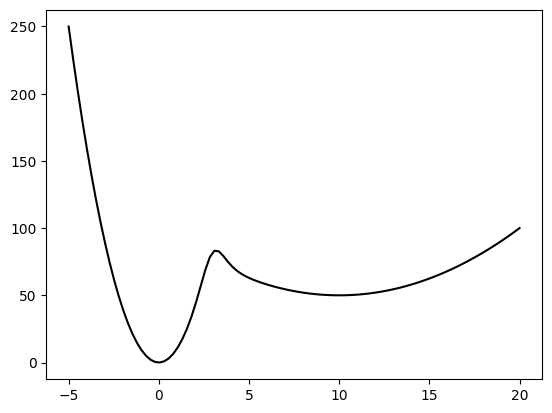

--------------------------alpha = 0.01---------------------------------------
step : 0/1000
step : 1/1000
step : 2/1000
step : 3/1000
step : 4/1000
step : 5/1000
step : 6/1000
step : 7/1000
step : 8/1000
step : 9/1000
step : 10/1000
step : 11/1000
step : 12/1000
step : 13/1000
step : 14/1000
step : 15/1000
step : 16/1000
step : 17/1000
step : 18/1000
step : 19/1000
step : 20/1000
step : 21/1000
step : 22/1000
step : 23/1000
step : 24/1000
step : 25/1000
step : 26/1000
step : 27/1000
step : 28/1000
step : 29/1000
step : 30/1000
step : 31/1000
step : 32/1000
step : 33/1000
step : 34/1000
step : 35/1000
step : 36/1000
step : 37/1000
step : 38/1000
step : 39/1000
step : 40/1000
step : 41/1000
step : 42/1000
step : 43/1000
step : 44/1000
step : 45/1000
step : 46/1000
step : 47/1000
step : 48/1000
step : 49/1000
step : 50/1000
step : 51/1000
step : 52/1000
step : 53/1000
step : 54/1000
step : 55/1000
step : 56/1000
step : 57/1000
step : 58/1000
step : 59/1000
step : 60/1000
step : 61/1000
st

In [43]:
import numpy as np
import matplotlib.pyplot as plt


np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

def f(x):
    return 1/(1 + np.exp(3*(x-3))) * 10 * x**2  + 1 / (1 + np.exp(-3*(x-3))) * (0.5*(x-10)**2 + 50)

def fprime(x):
    return 1 / (1 + np.exp((-3)*(x-3))) * (x-10) + 1/(1 + np.exp(3*(x-3))) * 20 * x + (3* np.exp(9))/(np.exp(9-1.5*x) + np.exp(1.5*x))**2 * ((0.5*(x-10)**2 + 50) - 10 * x**2) 

x = np.linspace(-5,20,100)
plt.plot(x,f(x), 'k')
plt.show()


alpha_lst = [0.01, 0.3,4]
iter_num = 50
epsilon = 1e-4
result = dict()
max_step = 1000

for alpha in alpha_lst:
    print(f"--------------------------alpha = {alpha}---------------------------------------")
    result[alpha] = []
    for i in range(iter_num):
        x = 25*np.random.random_sample()-5
        x_init = x
        step = 0
        while fprime(x) > epsilon or step < max_step:
            print(f"step : {step}/{max_step}")
            step +=1
            x = x - alpha * fprime(x)
        result[alpha].append((x,x_init))

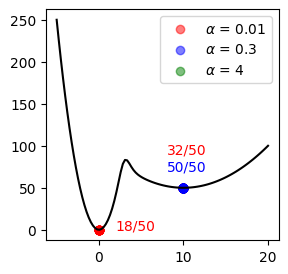

In [53]:
x = np.linspace(-5,20,100)
plt.figure(figsize=(3,3))
plt.plot(x,f(x), 'k')

x_lst = [pair[0] for pair in result[0.01]]
cnt_sharp = 0
cnt_wide = 0
for x in x_lst : 
    plt.scatter(x,f(x),color = 'r',alpha = 0.5)
    if f(x)<1:
        cnt_sharp +=1
    else:
        cnt_wide +=1
plt.scatter(x,f(x),color = 'r',alpha = 0.5,label = r"$\alpha$ = 0.01") # Dummy scatter
plt.text(2,0,str(cnt_sharp)+"/50",color = 'r')
plt.text(8,90,str(cnt_wide)+"/50",color = 'r')

x_lst = [pair[0] for pair in result[0.3]]
cnt_sharp = 0
cnt_wide = 0
for x in x_lst : 
    plt.scatter(x,f(x),color = 'b',alpha = 0.5)
    if f(x)<1:
        cnt_sharp +=1
    else:
        cnt_wide +=1
plt.scatter(x,f(x),color = 'b',alpha = 0.5,label = r"$\alpha$ = 0.3") # Dummy scatter
plt.text(8,70,str(cnt_wide)+"/50",color = 'b')


x_lst = [pair[0] for pair in result[4]]
cnt_sharp = 0
cnt_wide = 0
for x in x_lst : 
    plt.scatter(x,f(x),color = 'g',alpha = 0.5)
    if f(x)<1:
        cnt_sharp +=1
    else:
        cnt_wide +=1
plt.scatter(x,f(x),color = 'g',alpha = 0.5,label = r"$\alpha$ = 4") # Dummy scatter


plt.legend()
    

In [207]:
import numpy as np

class Convolution1d :
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size
        self.T = TransposedConvolution1d(self.__filt)

    def __matmul__(self, vector) :
        r, n = self.__r, vector.size
        
        return np.asarray([sum([self.__filt[i] * vector[i+j] for i in range(r)]) for j in range(n-r+1)])  # IMPLEMENT THIS
    
class TransposedConvolution1d :
    '''
    Transpose of 1-dimensional convolution operator used for the 
    transpose-convolution operation A.T@(...)
    '''
    def __init__(self, filt) :
        self.__filt = filt
        self.__r = filt.size

    def __matmul__(self, vector) :
        r = self.__r
        n = vector.size + r - 1
        vector = np.concatenate([np.zeros((r-1,)), vector, np.zeros((r-1,))]) # padding
        return  np.asarray([sum(self.__filt[::-1] * vector[i:i+3]) for i in range(len(vector)-r+1)]) # IMPLEMENT THIS

def huber_loss(x) :
    return np.sum( (1/2)*(x**2)*(np.abs(x)<=1) + (np.sign(x)*x-1/2)*(np.abs(x)>1) )
def huber_grad(x) :
    return x*(np.abs(x)<=1) + np.sign(x)*(np.abs(x)>1)


r, n, lam = 3, 20, 0.1

np.random.seed(0)
k = np.random.randn(r)
b = np.random.randn(n-r+1)
A = Convolution1d(k)
#from scipy.linalg import circulant
#A = circulant(np.concatenate((np.flip(k),np.zeros(n-r))))[r-1:,:]


x = np.zeros(n)
alpha = 0.01
for _ in range(100) :
    x = x - alpha*(A.T@(huber_grad(A@x-b))+lam*x)

print(huber_loss(A@x-b)+0.5*lam*np.linalg.norm(x)**2)




0.4587586843129764
